<a href="https://colab.research.google.com/github/StevenWu1/2022.08.02-Eco-Friendly-Diet/blob/main/Food_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_CO2 = pd.read_excel("/content/drive/MyDrive/US_Census.xlsx", sheet_name = "Food Availability (Per Capita) ")
df_Nutri = pd.read_excel("/content/drive/MyDrive/US_Census.xlsx", sheet_name = "Nutrition")
df_CO2 = df_CO2.fillna(0)
nullCount = df_CO2.isna().sum().sum()
df_Nutri

Mounted at /content/drive


,Food Category,Type of Food,Weight_kg,CO2 Emission,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Daily
0,Meat,Beef,1.0,59.6,2175.000000,243.405435,128.456522,0.836413,0.000000,0.000000,451.195652,4.344674,30.735326,0.788043,0.065612
1,Meat,Pork,1.0,7.2,1959.710145,224.731884,110.923188,6.073913,3.588406,0.000000,991.304348,4.495652,11.781159,11.797101,0.057829
2,Meat,Poultry,1.0,6.1,1960.389610,234.548052,105.155844,8.863636,0.112987,0.233766,1765.454545,4.417273,13.484416,9.831169,0.094840
3,Meat,Lamb,1.0,24.5,2112.812500,228.656250,126.609375,1.651042,0.000000,0.000000,3783.125000,2.410417,61.315625,18.281250,0.000915
4,Meat,Fish,1.0,5.1,1296.304348,196.739130,42.815217,18.641304,0.928261,0.347826,608.478261,2.585217,42.778261,8.000000,0.007107
5,Meat,Shrimp,1.0,11.8,850.000000,201.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006776
6,Dairy,Cheese,1.0,21.2,2686.666667,188.729630,193.507407,48.296296,31.314815,0.037037,1700.740741,0.964444,11.496296,2.333333,0.047954
7,Egg,Eggs,1.0,4.5,1190.000000,110.500000,74.233333,12.533333,11.433333,0.000000,1106.666667,1.323333,7.366667,1.666667,0.046826
8,Dairy,Milk,1.0,2.8,1605.000000,132.462500,60.375000,134.093750,108.793750,5.687500,2014.375000,2.191875,11.468750,62.187500,0.020376
9,Grain,Wheat,1.0,1.4,3104.814815,125.933333,35.033333,601.688889,40.662963,63.851852,475.185185,5.429259,11.844444,96.333333,0.162849


In [ ]:
!pip install pulp
from pulp import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
prob = LpProblem("Diet_Problem_1", LpMinimize)

In [ ]:
food_list = list(df_Nutri['Type of Food'])
meat = df_Nutri[df_Nutri['Type of Food'] == 'Meat']
meat_list = list(meat['Type of Food'])
dairy = df_Nutri[df_Nutri['Food Category'] == 'Dairy']
dairy_list = list(dairy['Type of Food'])
coffee = df_Nutri[df_Nutri['Food Category'] == 'Coffee']
coffee_list = list(coffee['Type of Food'])
vegetable = df_Nutri[df_Nutri['Food Category'] == 'Vegetable']
vegetable_list = list(vegetable['Type of Food'])

In [ ]:
Serving_Size = dict(zip(food_list, df_Nutri['Weight_kg']))
CO2_Emission = dict(zip(food_list,df_Nutri['CO2 Emission']))
Calories = dict(zip(food_list,df_Nutri['Energy_kcal']))
Protein = dict(zip(food_list,df_Nutri['Protein_g']))
Fat = dict(zip(food_list,df_Nutri['Fat_g']))
Carb = dict(zip(food_list,df_Nutri['Carb_g']))
Sugar = dict(zip(food_list,df_Nutri['Sugar_g']))
Fiber = dict(zip(food_list,df_Nutri['Fiber_g']))
VitA_mcg = dict(zip(food_list,df_Nutri['VitA_mcg']))
VitB_mcg = dict(zip(food_list,df_Nutri['VitB6_mg']))
VitC_mg = dict(zip(food_list,df_Nutri['VitB12_mcg']))

In [ ]:
food_vars = LpVariable.dicts("Food",food_list,0,cat='Continuous')

In [ ]:
prob += lpSum([CO2_Emission[i]*food_vars[i] for i in food_list])

prob += lpSum([Calories[f] * food_vars[f] for f in food_list]) >= 1500.0
prob += lpSum([Calories[f] * food_vars[f] for f in food_list]) <= 2500.0

prob += lpSum([Protein[f] * food_vars[f] for f in food_list]) >= 50
prob += lpSum([Protein[f] * food_vars[f] for f in food_list]) <= 1000

prob += lpSum([Fat[f] * food_vars[f] for f in food_list]) >= 20.0
prob += lpSum([Fat[f] * food_vars[f] for f in food_list]) <= 70.0

prob += lpSum([Carb[f] * food_vars[f] for f in food_list]) >= 130.0
prob += lpSum([Carb[f] * food_vars[f] for f in food_list]) <= 450.0

prob += lpSum([Sugar[f] * food_vars[f] for f in food_list]) >= 0
prob += lpSum([Sugar[f] * food_vars[f] for f in food_list]) <= 100

prob += lpSum([Fiber[f] * food_vars[f] for f in food_list]) >= 25.0
prob += lpSum([Fiber[f] * food_vars[f] for f in food_list]) <= 250.0

prob += lpSum([VitA_mcg[f] * food_vars[f] for f in food_list]) >= 500
prob += lpSum([VitA_mcg[f] * food_vars[f] for f in food_list]) <= 10000.0

prob += lpSum([VitB_mcg[f] * food_vars[f] for f in food_list]) >= 1.5
prob += lpSum([VitB_mcg[f] * food_vars[f] for f in food_list]) <= 10000.0

# prob += lpSum([VitC_mg[f] * food_vars[f] for f in food_list]) >= 50.0
# prob += lpSum([VitC_mg[f] * food_vars[f] for f in food_list]) <= 2000.0

prob += lpSum([food_vars[f] for f in meat_list]) >= 0.1

prob += lpSum([food_vars[f] for f in dairy_list]) >= 0.735

prob += lpSum([food_vars[f] for f in coffee_list]) >= 0.01

prob += lpSum([food_vars[f] for f in vegetable_list]) <= 0.1

In [ ]:
prob.writeLP("SimpleDietProblem.lp")

[Food_Apples,
 Food_Bananas,
 Food_Beef,
 Food_Berries,
 Food_Cheese,
 Food_Citrus_Fruit,
 Food_Coffee,
 Food_Eggs,
 Food_Fish,
 Food_Lamb,
 Food_Milk,
 Food_Onions,
 Food_Peas,
 Food_Pork,
 Food_Potatoes,
 Food_Poultry,
 Food_Shrimp,
 Food_Tomatoes,
 Food_Wheat]

In [ ]:
prob.solve()

1

In [ ]:
print("Status:", LpStatus[prob.status])

Status: Optimal


In [ ]:
print("Therefore, the optimal (least CO2) balanced diet consists of\n"+"-")
for v in prob.variables():
    if v.varValue>0:
        print(v.name, "=", v.varValue, "kg")

print("")
print("")
print("Average American Daily Diet:")
print("")
for i in range(len(df_Nutri["Food Category"])):
  print(df_Nutri['Type of Food'][i], "=", df_Nutri["Daily"][i])

Therefore, the optimal (least CO2) balanced diet consists of
-
Food_Apples = 0.044393206 kg
Food_Coffee = 0.01 kg
Food_Fish = 0.1 kg
Food_Milk = 0.735 kg
Food_Potatoes = 0.1 kg
Food_Wheat = 0.26176958 kg


Average American Daily Diet:

Beef = 0.06561225087
Pork = 0.05782867225
Poultry = 0.09484010169
Lamb = 0.0009147078089
Fish = 0.007106736653
Shrimp = 0.006775753857
Cheese = 0.0479536464
Eggs = 0.04682620775
Milk = 0.02037597872
Wheat = 0.1628489353
Tomatoes = 0.08467109453
Peas = 0.001560003016
Potatoes = 0.02414640586
Onions = 0.002282161641
Berries = 0.03553615867
Bananas = 0.0340242089
Citrus Fruit = 0.09136802846
Apples = 0.05526360468
Coffee = 0.008845823485


The total CO2 production of this balanced diet is: 3.14 kg
The total CO2 production of the average American diet is: 6.94 kg


<BarContainer object of 20 artists>

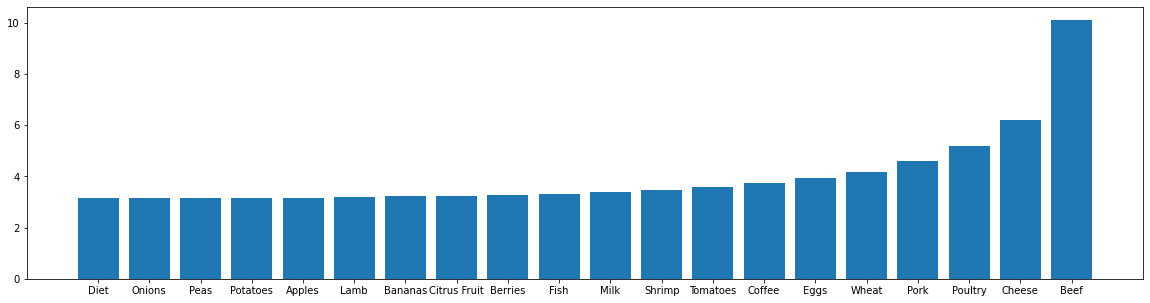

In [ ]:
print("The total CO2 production of this balanced diet is: {}".format(round(value(prob.objective),2)), "kg")
total = 0
gradual = []
food_item = []
for i in range(len(df_Nutri["Food Category"])):
  sum = (df_Nutri["CO2 Emission"][i] * df_Nutri["Daily"][i])
  total = total + sum
  gradual.append([df_Nutri["Type of Food"][i], round(sum, 2)])

gradual = np.sort(gradual)
print("The total CO2 production of the average American diet is:", round(total, 2), "kg")
plt.figure(figsize = (20, 5))





values = []
for i in range(len(gradual)):
  values.append((gradual[i][0], gradual[i][1]))
values.sort()
tot = round(value(prob.objective),2)
aldskfj = [round(value(prob.objective),2)]
foods = ["Diet"]
for i in range(len(values)):
  tot = tot + float(values[i][0])
  aldskfj.append(tot)
  foods.append(values[i][1])
plt.bar(foods, aldskfj)